In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from prettytable import PrettyTable

from sklearn import preprocessing
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
warnings.simplefilter('ignore')

# Part I: Introduction

The goal of this project is to create a unique Machine Learning classification algorithm that will help determine whether a data observation of water tested is drinkable or not. This is a binary classifier problem. The dataframe's final column is the class variable 0 or 1, and there are 9 numeric independent variables described below to help determine the class. 

**1. `pH value`:**
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

**2. `Hardness`:**
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

**3. `Solids` (Total dissolved solids - TDS):**
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

**4. `Chloramines`:**
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

**5. `Sulfate`:**
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

**6. `Conductivity`:**
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

**7. `Organic_carbon`:**
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

**8. `Trihalomethanes`:**
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

**9. `Turbidity`:**
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

**10. `Potability` (Target) :**
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

# PART II: Technical Plans

The Data set I used will be a Dataframe of 3276 observations. First, the data will be cleaned, missing values will be handled by mean input for each class. Then an EDA will be conducted and graphs displaying the distribution for each feature (column). Since there are thousands of observations, we can expect a Normal distribution using a kde plot, and since we have 2 classes, we can use the Seaborn hue feature to display the distribution of deatures by class as well. In addition, we will run a Correlation Heatmap for the features, and our results will show that all features are essentially independent. This is helpful information, in that we can not combine them and should not do any feature engineering. The main objective then is to build a model that performs well for training 9 independent numeric data columns. 

The next step would be Model preparation by ensuring even distribution of both classes using SMOTE() since they are unequal, and splitting the data into 80% training and 20% testing. Then we will scale all the features since they exist on different scales.

Finally, model selection. Using the generic parameters, I have selected sklearn's machine learning classifiers;  LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(),
ExtraTreesClassifier(), LinearSVC(). Each of these classifiers has their own merit but most surprisingly I selected a Boosting Algorithm CatBoostClassifier() that proved to have not only the highest training accuracy but best testing algorithm. Several models have produced overfitting. 

After selecting the `CatBoostAlgorithm()` we can tune the parameters to get an even better testing accuracy of 81%. By far the highest among all models utilized.
                       

# PART III: Data Loading & Preparation

In [3]:
#Load Data

data = pd.read_csv('https://raw.githubusercontent.com/atreish/AIM_5005_Machine_Learning/main/water_potability.csv')
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [4]:
#Summary statitics of our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
#Summary Statatistics for each Column

data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
#How many Null values in our data?

data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
#Fill in Null-Values for each Column by their Mean for each class i.e. FOR Potability = 0 or 1

ph_0 = data[data['Potability'] == 0]['ph'].mean(skipna=True)
data.loc[(data['Potability'] == 0) & (data['ph'].isna()), 'ph'] = ph_0
ph_1 = data[data['Potability'] == 1]['ph'].mean(skipna=True)
data.loc[(data['Potability'] == 1) & (data['ph'].isna()), 'ph'] = ph_1

sulfate_0 = data[data['Potability'] == 0]['Sulfate'].mean(skipna=True)
data.loc[(data['Potability'] == 0) & (data['Sulfate'].isna()), 'Sulfate'] = sulfate_0
sulfate_1 = data[data['Potability'] == 1]['Sulfate'].mean(skipna=True)
data.loc[(data['Potability'] == 1) & (data['Sulfate'].isna()), 'Sulfate'] = sulfate_1

Trihalomethanes_0 = data[data['Potability'] == 0]['Trihalomethanes'].mean(skipna=True)
data.loc[(data['Potability'] == 0) & (data['Trihalomethanes'].isna()), 'Trihalomethanes'] = Trihalomethanes_0
Trihalomethanes_1 = data[data['Potability'] == 1]['Trihalomethanes'].mean(skipna=True)
data.loc[(data['Potability'] == 1) & (data['Trihalomethanes'].isna()), 'Trihalomethanes'] = Trihalomethanes_1

data.isnull().sum() #Verify there are no longer missing values

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [8]:
data.describe() #New DataFrame without NaN values

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080855,196.369496,22014.092526,7.122277,333.785123,426.205111,14.284970,66.395671,3.966786,0.390110
std,1.469958,32.879761,8768.570828,1.583085,36.145701,80.824064,3.308162,15.769901,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.085378,196.967627,20927.833607,7.130299,334.564290,421.884968,14.218338,66.303555,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [9]:
#Ensure that the Response Variable is now labelled as a class and converted to categorical variable
data['Potability'] = preprocessing.LabelEncoder().fit_transform(data['Potability'])
data['Potability'] = data['Potability'].astype('category')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ph               3276 non-null   float64 
 1   Hardness         3276 non-null   float64 
 2   Solids           3276 non-null   float64 
 3   Chloramines      3276 non-null   float64 
 4   Sulfate          3276 non-null   float64 
 5   Conductivity     3276 non-null   float64 
 6   Organic_carbon   3276 non-null   float64 
 7   Trihalomethanes  3276 non-null   float64 
 8   Turbidity        3276 non-null   float64 
 9   Potability       3276 non-null   category
dtypes: category(1), float64(9)
memory usage: 233.8 KB


# Explatory Data Analysis

The Total Number of Observations in a class is 3276

The Number of Class=0 observations is 1998
The Percent of Class=0 observations is 60.99%

The Number of Class=1 observations is 1278
The Percent of Class=1 observations is 39.01%



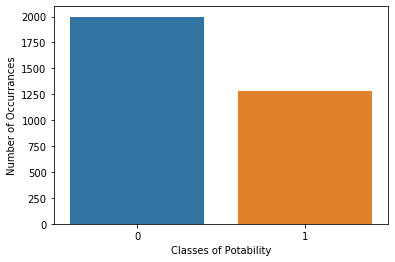

In [11]:
#Data about the Class Variable

class0_sum = (data['Potability'] == 0).sum()
class0_percent = (data['Potability'] == 0).sum() / len(data['Potability'])
class1_sum = (data['Potability'] == 1).sum()
class1_percent = (data['Potability'] == 1).sum() / len(data['Potability'])

print('The Total Number of Observations in a class is {}'.format(len(data['Potability'])))
print('\nThe Number of Class=0 observations is {}'.format(class0_sum))
print('The Percent of Class=0 observations is {0:.2%}'.format(class0_percent))
print('\nThe Number of Class=1 observations is {}'.format(class1_sum))
print('The Percent of Class=1 observations is {0:.2%}'.format(class1_percent))
print('')

sns.countplot(x="Potability", data=data)
plt.xlabel('Classes of Potability')
plt.ylabel('Number of Occurrances')
plt.show()

In [12]:
#Correlation Matrix
corr = data.corr()
corr

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
ph,1.000000,0.075878,-0.081887,-0.031827,0.014785,0.017205,0.040092,0.003009,-0.036211
Hardness,0.075878,1.000000,-0.046899,-0.030054,-0.092718,-0.023915,0.003610,-0.012718,-0.014449
Solids,-0.081887,-0.046899,1.000000,-0.070148,-0.149809,0.013831,0.010242,-0.008849,0.019546
Chloramines,-0.031827,-0.030054,-0.070148,1.000000,0.023490,-0.020486,-0.012653,0.016615,0.002363
Sulfate,0.014785,-0.092718,-0.149809,0.023490,1.000000,-0.014196,0.027403,-0.025797,-0.009523
Conductivity,0.017205,-0.023915,0.013831,-0.020486,-0.014196,1.000000,0.020966,0.001238,0.005798
Organic_carbon,0.040092,0.003610,0.010242,-0.012653,0.027403,0.020966,1.000000,-0.012944,-0.027308
Trihalomethanes,0.003009,-0.012718,-0.008849,0.016615,-0.025797,0.001238,-0.012944,1.000000,-0.021540
Turbidity,-0.036211,-0.014449,0.019546,0.002363,-0.009523,0.005798,-0.027308,-0.021540,1.000000


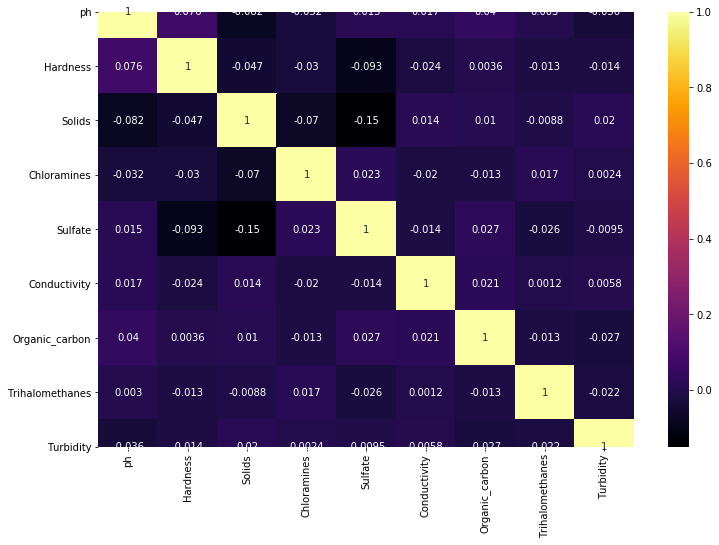

In [13]:
#Heatmap of Correlation Matrix

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="inferno")

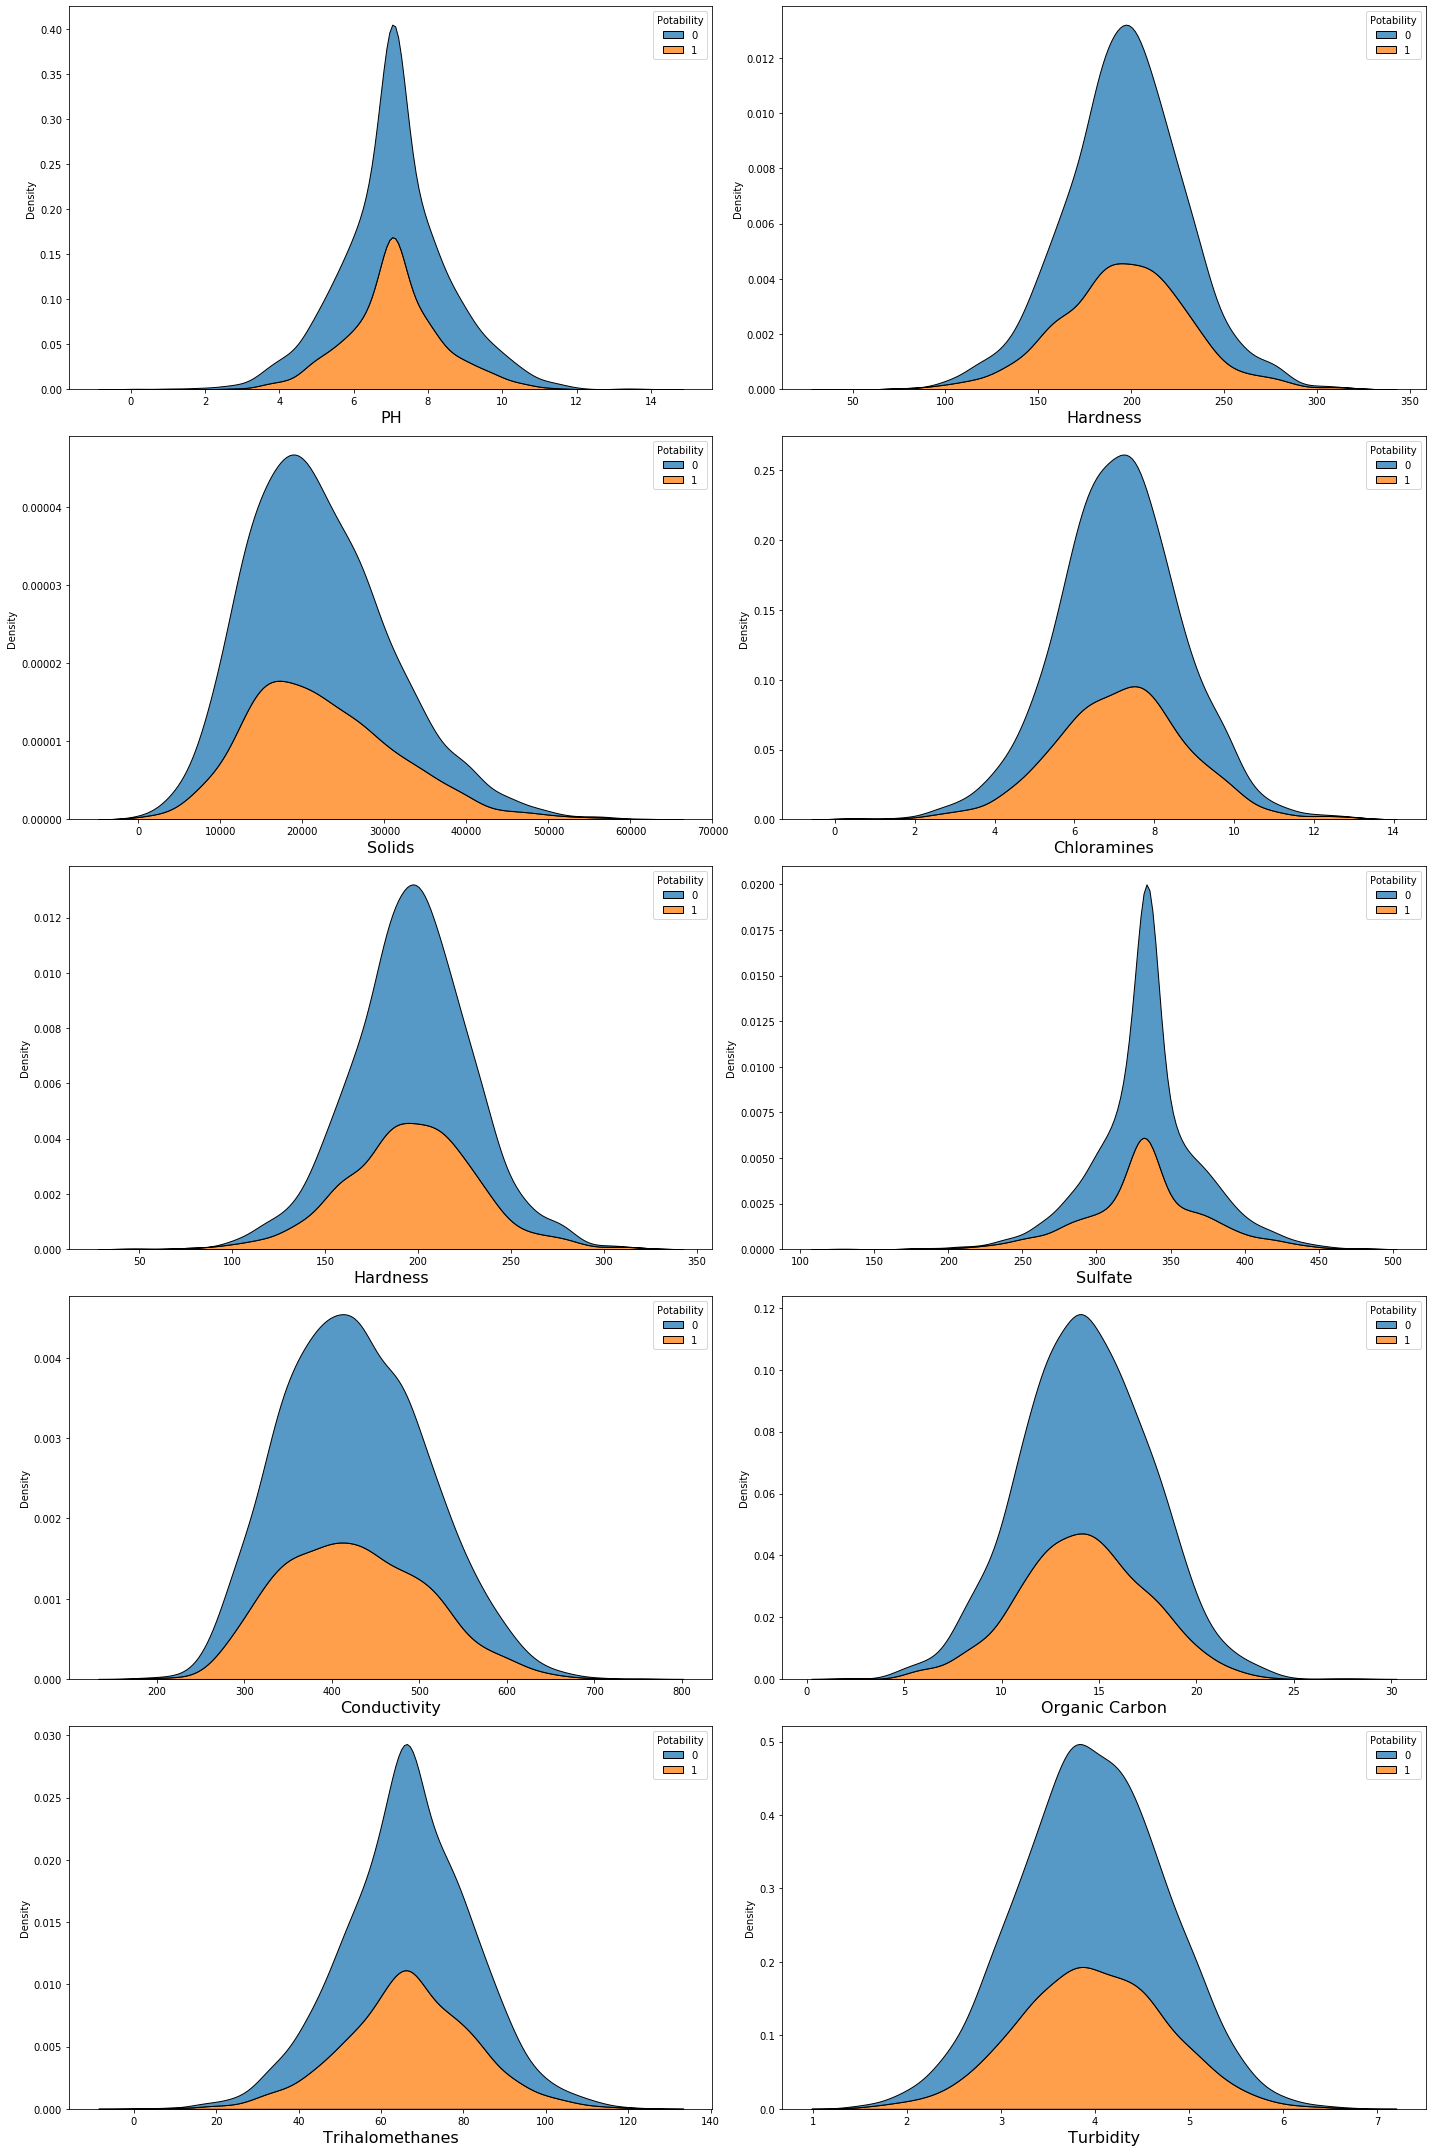

In [14]:
plt.figure(figsize = (20,30))
plt.subplot(5,2,1)
sns.kdeplot(data=data, x=data['ph'], fill=True, hue="Potability", multiple='stack').set_xlabel('PH',fontsize=16)
plt.subplot(5,2,2)
sns.kdeplot(data=data, x=data['Hardness'], fill=True, hue="Potability", multiple='stack').set_xlabel('Hardness',fontsize=16)
plt.subplot(5,2,3)
sns.kdeplot(data=data, x=data['Solids'], fill=True, hue="Potability", multiple='stack').set_xlabel('Solids',fontsize=16)
plt.subplot(5,2,4)
sns.kdeplot(data=data, x=data['Chloramines'], fill=True, hue="Potability", multiple='stack').set_xlabel('Chloramines',fontsize=16)
plt.subplot(5,2,5)
sns.kdeplot(data=data, x=data['Hardness'], fill=True, hue="Potability", multiple='stack').set_xlabel('Hardness',fontsize=16)
plt.subplot(5,2,6)
sns.kdeplot(data=data, x=data['Sulfate'], fill=True, hue="Potability", multiple='stack').set_xlabel('Sulfate',fontsize=16)
plt.subplot(5,2,7)
sns.kdeplot(data=data, x=data['Conductivity'], fill=True, hue="Potability", multiple='stack').set_xlabel('Conductivity',fontsize=16)
plt.subplot(5,2,8)
sns.kdeplot(data=data, x=data['Organic_carbon'], fill=True, hue="Potability", multiple='stack').set_xlabel('Organic Carbon',fontsize=16)
plt.subplot(5,2,9)
sns.kdeplot(data=data, x=data['Trihalomethanes'], fill=True, hue="Potability", multiple='stack').set_xlabel('Trihalomethanes',fontsize=16)
plt.subplot(5,2,10)
sns.kdeplot(data=data, x=data['Turbidity'], fill=True, hue="Potability", multiple='stack').set_xlabel('Turbidity',fontsize=16)

plt.tight_layout()
plt.show()

# Part IV: Model Preparation

In [15]:
#Training and Testing set
X = data.drop('Potability', axis =1).copy()
y = data['Potability'].copy()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)

#Standardize Data
ssc = StandardScaler()
X_train = ssc.fit_transform(X_train)
X_test = ssc.transform(X_test)

# Part V: Experiment & Evaluation

In [16]:
algorithms = [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), GaussianNB(), 
              RandomForestClassifier(), ExtraTreesClassifier(), svm.LinearSVC(), CatBoostClassifier()]

trainAccuracy = [0]*8
testAccuracy = [0]*8


for i, model in enumerate(algorithms):
    model.fit(X_train, y_train)
    
    #Prediction 
    X_pred = model.predict(X_train)
    X_tested = model.predict(X_test)
    
    #Accuracy of Prediction
    training_score = metrics.accuracy_score(y_train, X_pred)
    test_score = metrics.accuracy_score(y_test, X_tested)
    
    #Reporting 
    trainAccuracy[i] = training_score
    testAccuracy[i] = test_score

Learning rate set to 0.016436
0:	learn: 0.6857653	total: 58.7ms	remaining: 58.7s
1:	learn: 0.6791413	total: 63.4ms	remaining: 31.7s
2:	learn: 0.6736140	total: 68.7ms	remaining: 22.8s
3:	learn: 0.6683477	total: 72.8ms	remaining: 18.1s
4:	learn: 0.6631537	total: 77.1ms	remaining: 15.3s
5:	learn: 0.6578860	total: 80.4ms	remaining: 13.3s
6:	learn: 0.6514626	total: 84ms	remaining: 11.9s
7:	learn: 0.6448308	total: 87.4ms	remaining: 10.8s
8:	learn: 0.6405947	total: 90.6ms	remaining: 9.98s
9:	learn: 0.6340922	total: 93.8ms	remaining: 9.29s
10:	learn: 0.6298738	total: 96.7ms	remaining: 8.69s
11:	learn: 0.6253685	total: 100ms	remaining: 8.27s
12:	learn: 0.6219413	total: 104ms	remaining: 7.89s
13:	learn: 0.6186698	total: 107ms	remaining: 7.54s
14:	learn: 0.6157767	total: 110ms	remaining: 7.21s
15:	learn: 0.6112432	total: 113ms	remaining: 6.98s
16:	learn: 0.6083252	total: 117ms	remaining: 6.75s
17:	learn: 0.6046617	total: 120ms	remaining: 6.55s
18:	learn: 0.5989006	total: 124ms	remaining: 6.38s
19

173:	learn: 0.4533359	total: 941ms	remaining: 4.47s
174:	learn: 0.4526929	total: 945ms	remaining: 4.46s
175:	learn: 0.4521893	total: 952ms	remaining: 4.46s
176:	learn: 0.4512812	total: 958ms	remaining: 4.45s
177:	learn: 0.4507822	total: 964ms	remaining: 4.45s
178:	learn: 0.4504540	total: 970ms	remaining: 4.45s
179:	learn: 0.4499624	total: 974ms	remaining: 4.44s
180:	learn: 0.4496641	total: 977ms	remaining: 4.42s
181:	learn: 0.4492440	total: 982ms	remaining: 4.41s
182:	learn: 0.4488802	total: 986ms	remaining: 4.4s
183:	learn: 0.4485852	total: 989ms	remaining: 4.38s
184:	learn: 0.4483101	total: 993ms	remaining: 4.37s
185:	learn: 0.4477814	total: 996ms	remaining: 4.36s
186:	learn: 0.4475395	total: 1000ms	remaining: 4.35s
187:	learn: 0.4470760	total: 1s	remaining: 4.33s
188:	learn: 0.4468154	total: 1.01s	remaining: 4.32s
189:	learn: 0.4465182	total: 1.01s	remaining: 4.3s
190:	learn: 0.4462388	total: 1.01s	remaining: 4.29s
191:	learn: 0.4458503	total: 1.02s	remaining: 4.28s
192:	learn: 0.44

375:	learn: 0.3826395	total: 1.68s	remaining: 2.79s
376:	learn: 0.3823568	total: 1.69s	remaining: 2.79s
377:	learn: 0.3821809	total: 1.69s	remaining: 2.79s
378:	learn: 0.3816734	total: 1.7s	remaining: 2.78s
379:	learn: 0.3813814	total: 1.7s	remaining: 2.78s
380:	learn: 0.3811279	total: 1.71s	remaining: 2.78s
381:	learn: 0.3808518	total: 1.72s	remaining: 2.77s
382:	learn: 0.3805539	total: 1.72s	remaining: 2.77s
383:	learn: 0.3803594	total: 1.72s	remaining: 2.76s
384:	learn: 0.3801136	total: 1.72s	remaining: 2.75s
385:	learn: 0.3797326	total: 1.73s	remaining: 2.75s
386:	learn: 0.3794295	total: 1.73s	remaining: 2.74s
387:	learn: 0.3792517	total: 1.74s	remaining: 2.74s
388:	learn: 0.3789245	total: 1.74s	remaining: 2.73s
389:	learn: 0.3785402	total: 1.74s	remaining: 2.72s
390:	learn: 0.3782744	total: 1.74s	remaining: 2.72s
391:	learn: 0.3779482	total: 1.75s	remaining: 2.71s
392:	learn: 0.3777729	total: 1.75s	remaining: 2.71s
393:	learn: 0.3775354	total: 1.75s	remaining: 2.7s
394:	learn: 0.3

535:	learn: 0.3395214	total: 2.25s	remaining: 1.94s
536:	learn: 0.3393076	total: 2.25s	remaining: 1.94s
537:	learn: 0.3386647	total: 2.26s	remaining: 1.94s
538:	learn: 0.3384325	total: 2.27s	remaining: 1.94s
539:	learn: 0.3382388	total: 2.27s	remaining: 1.93s
540:	learn: 0.3379894	total: 2.27s	remaining: 1.93s
541:	learn: 0.3376421	total: 2.28s	remaining: 1.92s
542:	learn: 0.3374126	total: 2.28s	remaining: 1.92s
543:	learn: 0.3371483	total: 2.28s	remaining: 1.91s
544:	learn: 0.3364836	total: 2.29s	remaining: 1.91s
545:	learn: 0.3362381	total: 2.29s	remaining: 1.9s
546:	learn: 0.3354571	total: 2.29s	remaining: 1.9s
547:	learn: 0.3352213	total: 2.3s	remaining: 1.89s
548:	learn: 0.3346162	total: 2.3s	remaining: 1.89s
549:	learn: 0.3344339	total: 2.3s	remaining: 1.88s
550:	learn: 0.3336416	total: 2.31s	remaining: 1.88s
551:	learn: 0.3333890	total: 2.31s	remaining: 1.88s
552:	learn: 0.3331819	total: 2.31s	remaining: 1.87s
553:	learn: 0.3330307	total: 2.32s	remaining: 1.86s
554:	learn: 0.332

697:	learn: 0.2990554	total: 2.81s	remaining: 1.22s
698:	learn: 0.2988023	total: 2.81s	remaining: 1.21s
699:	learn: 0.2985592	total: 2.82s	remaining: 1.21s
700:	learn: 0.2983582	total: 2.83s	remaining: 1.21s
701:	learn: 0.2981536	total: 2.83s	remaining: 1.2s
702:	learn: 0.2978943	total: 2.83s	remaining: 1.2s
703:	learn: 0.2975383	total: 2.84s	remaining: 1.19s
704:	learn: 0.2973916	total: 2.84s	remaining: 1.19s
705:	learn: 0.2971880	total: 2.85s	remaining: 1.18s
706:	learn: 0.2970176	total: 2.85s	remaining: 1.18s
707:	learn: 0.2967130	total: 2.85s	remaining: 1.18s
708:	learn: 0.2963920	total: 2.85s	remaining: 1.17s
709:	learn: 0.2961413	total: 2.86s	remaining: 1.17s
710:	learn: 0.2958808	total: 2.86s	remaining: 1.16s
711:	learn: 0.2957189	total: 2.86s	remaining: 1.16s
712:	learn: 0.2954802	total: 2.87s	remaining: 1.15s
713:	learn: 0.2953215	total: 2.87s	remaining: 1.15s
714:	learn: 0.2950937	total: 2.87s	remaining: 1.15s
715:	learn: 0.2947401	total: 2.88s	remaining: 1.14s
716:	learn: 0.

902:	learn: 0.2581135	total: 3.56s	remaining: 382ms
903:	learn: 0.2579724	total: 3.56s	remaining: 379ms
904:	learn: 0.2577691	total: 3.57s	remaining: 375ms
905:	learn: 0.2576272	total: 3.58s	remaining: 371ms
906:	learn: 0.2574050	total: 3.58s	remaining: 367ms
907:	learn: 0.2572201	total: 3.58s	remaining: 363ms
908:	learn: 0.2570363	total: 3.59s	remaining: 359ms
909:	learn: 0.2569526	total: 3.59s	remaining: 355ms
910:	learn: 0.2568860	total: 3.6s	remaining: 351ms
911:	learn: 0.2564599	total: 3.6s	remaining: 347ms
912:	learn: 0.2562869	total: 3.6s	remaining: 344ms
913:	learn: 0.2560964	total: 3.61s	remaining: 340ms
914:	learn: 0.2558941	total: 3.61s	remaining: 336ms
915:	learn: 0.2557676	total: 3.62s	remaining: 332ms
916:	learn: 0.2555687	total: 3.62s	remaining: 328ms
917:	learn: 0.2553763	total: 3.62s	remaining: 324ms
918:	learn: 0.2551860	total: 3.63s	remaining: 320ms
919:	learn: 0.2549246	total: 3.63s	remaining: 316ms
920:	learn: 0.2547417	total: 3.63s	remaining: 312ms
921:	learn: 0.2

In [63]:
columns = ['Classification Algorithm', 'Training Accuracy', 'Testing Accuracy']
Results = PrettyTable()
  
# Add Columns
Results.add_column(columns[0], algorithms)
Results.add_column(columns[1], trainAccuracy)
Results.add_column(columns[2], testAccuracy)
print(Results)
print('\nMaximum Testing Accuracy is {}%'.format(np.round(max(testAccuracy),4)*100))

+-------------------------------------------------------------+--------------------+--------------------+
|                   Classification Algorithm                  | Training Accuracy  |  Testing Accuracy  |
+-------------------------------------------------------------+--------------------+--------------------+
|                     LogisticRegression()                    | 0.5261219022103149 | 0.4993894993894994 |
|                    KNeighborsClassifier()                   | 0.790689886135298  | 0.5897435897435898 |
|                   DecisionTreeClassifier()                  |        1.0         | 0.7264957264957265 |
|                         GaussianNB()                        | 0.5599464166108507 | 0.5518925518925519 |
|                   RandomForestClassifier()                  |        1.0         | 0.7631257631257631 |
|                    ExtraTreesClassifier()                   |        1.0         | 0.6947496947496947 |
|                         LinearSVC()         

# CatBoost Algorithm

In [60]:
"""Normally, we would standardize the data, but CatBoost takes care if it for us. We don't need to
even have cleaned data or just numeric, but our data is already cleaned and ready for processing"""

#Training and Testing Set

X = data.drop('Potability', axis=1).copy()
y = data['Potability'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

cb_model = CatBoostClassifier(iterations=450, random_state=20, learning_rate=0.15, eval_metric="F1")
cb_model.fit(X_train, y_train, plot=True, eval_set=(X_test, y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.4588492	test: 0.4898785	best: 0.4898785 (0)	total: 3.88ms	remaining: 1.74s
1:	learn: 0.4296754	test: 0.4439655	best: 0.4898785 (0)	total: 11.5ms	remaining: 2.57s
2:	learn: 0.6269036	test: 0.6394316	best: 0.6394316 (2)	total: 16.8ms	remaining: 2.51s
3:	learn: 0.5854342	test: 0.5921569	best: 0.6394316 (2)	total: 21ms	remaining: 2.34s
4:	learn: 0.6096402	test: 0.6467290	best: 0.6467290 (4)	total: 27.1ms	remaining: 2.41s
5:	learn: 0.6123557	test: 0.6436782	best: 0.6467290 (4)	total: 38.6ms	remaining: 2.86s
6:	learn: 0.6180837	test: 0.6541353	best: 0.6541353 (6)	total: 47.4ms	remaining: 3s
7:	learn: 0.6252505	test: 0.6604478	best: 0.6604478 (7)	total: 55.5ms	remaining: 3.06s
8:	learn: 0.6436629	test: 0.6605839	best: 0.6605839 (8)	total: 62.6ms	remaining: 3.07s
9:	learn: 0.6722907	test: 0.6582278	best: 0.6605839 (8)	total: 69.6ms	remaining: 3.06s
10:	learn: 0.6744186	test: 0.6594595	best: 0.6605839 (8)	total: 77.4ms	remaining: 3.09s
11:	learn: 0.6842784	test: 0.6690519	best: 0.66

95:	learn: 0.9115493	test: 0.7313916	best: 0.7346278 (93)	total: 364ms	remaining: 1.34s
96:	learn: 0.9120631	test: 0.7346278	best: 0.7346278 (93)	total: 368ms	remaining: 1.34s
97:	learn: 0.9126761	test: 0.7346278	best: 0.7346278 (93)	total: 372ms	remaining: 1.33s
98:	learn: 0.9145107	test: 0.7322581	best: 0.7346278 (93)	total: 376ms	remaining: 1.33s
99:	learn: 0.9164330	test: 0.7342995	best: 0.7346278 (93)	total: 380ms	remaining: 1.33s
100:	learn: 0.9186764	test: 0.7346278	best: 0.7346278 (93)	total: 385ms	remaining: 1.33s
101:	learn: 0.9215247	test: 0.7354839	best: 0.7354839 (101)	total: 389ms	remaining: 1.33s
102:	learn: 0.9245388	test: 0.7228525	best: 0.7354839 (101)	total: 393ms	remaining: 1.32s
103:	learn: 0.9258226	test: 0.7249191	best: 0.7354839 (101)	total: 407ms	remaining: 1.35s
104:	learn: 0.9298441	test: 0.7231270	best: 0.7354839 (101)	total: 412ms	remaining: 1.35s
105:	learn: 0.9316287	test: 0.7207792	best: 0.7354839 (101)	total: 416ms	remaining: 1.35s
106:	learn: 0.9337785

191:	learn: 0.9919829	test: 0.7361769	best: 0.7440382 (134)	total: 726ms	remaining: 976ms
192:	learn: 0.9914439	test: 0.7350158	best: 0.7440382 (134)	total: 732ms	remaining: 975ms
193:	learn: 0.9919829	test: 0.7350158	best: 0.7440382 (134)	total: 736ms	remaining: 971ms
194:	learn: 0.9919829	test: 0.7373418	best: 0.7440382 (134)	total: 740ms	remaining: 967ms
195:	learn: 0.9925214	test: 0.7361769	best: 0.7440382 (134)	total: 746ms	remaining: 967ms
196:	learn: 0.9925214	test: 0.7338583	best: 0.7440382 (134)	total: 753ms	remaining: 967ms
197:	learn: 0.9925214	test: 0.7350158	best: 0.7440382 (134)	total: 759ms	remaining: 966ms
198:	learn: 0.9930593	test: 0.7333333	best: 0.7440382 (134)	total: 766ms	remaining: 966ms
199:	learn: 0.9930593	test: 0.7313196	best: 0.7440382 (134)	total: 769ms	remaining: 962ms
200:	learn: 0.9930593	test: 0.7313196	best: 0.7440382 (134)	total: 773ms	remaining: 958ms
201:	learn: 0.9925214	test: 0.7321712	best: 0.7440382 (134)	total: 778ms	remaining: 955ms
202:	learn

294:	learn: 0.9989384	test: 0.7370079	best: 0.7440382 (134)	total: 1.26s	remaining: 664ms
295:	learn: 0.9989384	test: 0.7381703	best: 0.7440382 (134)	total: 1.27s	remaining: 660ms
296:	learn: 0.9989384	test: 0.7361769	best: 0.7440382 (134)	total: 1.27s	remaining: 655ms
297:	learn: 0.9989384	test: 0.7361769	best: 0.7440382 (134)	total: 1.28s	remaining: 652ms
298:	learn: 0.9989384	test: 0.7353407	best: 0.7440382 (134)	total: 1.28s	remaining: 647ms
299:	learn: 0.9989384	test: 0.7373418	best: 0.7440382 (134)	total: 1.28s	remaining: 643ms
300:	learn: 0.9989384	test: 0.7385103	best: 0.7440382 (134)	total: 1.29s	remaining: 638ms
301:	learn: 0.9989384	test: 0.7373418	best: 0.7440382 (134)	total: 1.29s	remaining: 633ms
302:	learn: 0.9989384	test: 0.7350158	best: 0.7440382 (134)	total: 1.29s	remaining: 628ms
303:	learn: 0.9994695	test: 0.7361769	best: 0.7440382 (134)	total: 1.3s	remaining: 624ms
304:	learn: 0.9994695	test: 0.7361769	best: 0.7440382 (134)	total: 1.3s	remaining: 620ms
305:	learn: 

397:	learn: 1.0000000	test: 0.7452229	best: 0.7500000 (373)	total: 1.63s	remaining: 213ms
398:	learn: 1.0000000	test: 0.7440382	best: 0.7500000 (373)	total: 1.64s	remaining: 209ms
399:	learn: 1.0000000	test: 0.7440382	best: 0.7500000 (373)	total: 1.64s	remaining: 205ms
400:	learn: 1.0000000	test: 0.7460317	best: 0.7500000 (373)	total: 1.64s	remaining: 201ms
401:	learn: 1.0000000	test: 0.7460317	best: 0.7500000 (373)	total: 1.65s	remaining: 197ms
402:	learn: 1.0000000	test: 0.7503975	best: 0.7503975 (402)	total: 1.66s	remaining: 193ms
403:	learn: 1.0000000	test: 0.7523810	best: 0.7523810 (403)	total: 1.67s	remaining: 190ms
404:	learn: 1.0000000	test: 0.7523810	best: 0.7523810 (403)	total: 1.68s	remaining: 186ms
405:	learn: 1.0000000	test: 0.7492063	best: 0.7523810 (403)	total: 1.68s	remaining: 183ms
406:	learn: 1.0000000	test: 0.7452229	best: 0.7523810 (403)	total: 1.7s	remaining: 179ms
407:	learn: 1.0000000	test: 0.7480190	best: 0.7523810 (403)	total: 1.7s	remaining: 175ms
408:	learn: 

In [64]:
y_pred = cb_model.predict(X_test)
cb_accuracy = metrics.accuracy_score(y_test, y_pred)
print('The tuned CatBoost Algorithm gives us {}% accuracy'.format(np.round(cb_accuracy,4)*100))
print('\nvs')
print('\nThe generic CatBoost Algorithm gave us {}% accuracy'.format(np.round(testAccuracy[7],4)*100))

The tuned CatBoost Algorithm gives us 80.95% accuracy

vs

The generic CatBoost Algorithm gave us 76.19% accuracy


# Part V: Conclusion

Testing water samples for drinkability is of major importance and is very essential for public health and human needs. These samples, when tested for 9 different chemical display a range of values that are approximately Normally distributed with their individual range. This poses a challenge for classifying a sample of water as drinkable or not. Here we have binary classes; potable or not. But, with so many numeric features we have to select an algorithm that is most efficient. The CatBoostClassifier() was the best performing model that gave a 80.95% accuracy for the testing data. 

# References

`https://www.youtube.com/watch?v=8o0e-r0B5xQ`

`https://catboost.ai/docs/concepts/python-reference_catboostclassifier.html`

`https://catboost.ai/docs/concepts/python-installation.html`

